In [1]:
import numpy as np
from hmmlearn import hmm
import warnings
from sklearn import neighbors, preprocessing
import pandas as pd
import seaborn as sns
import pprint


from analytic import utility, performance, ta_indicators, hmm_strategy, math_formula, statistics, visual

import math
from matplotlib import cm
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from scipy import stats

# please run $ jupyter notebook at "udacity/_p_f/src" folder

/home/boweiliu/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
symbols = ('AMAT', )
csv_files = [utility.get_appropriate_file(symbol) for symbol in symbols]
requested_col = ['time', 'high', 'low', 'open', 'close']
the_df = utility.get_cols_from_csv_names(file_names=csv_files,
                                         interested_col=requested_col,
                                         join_spy_for_data_integrity=False,
                                         keep_spy_if_not_having_spy=False,
                                         base_dir="./rawdata")
daily_grp = the_df.groupby(pd.Grouper(level=0, freq='1d'))
daily_rtn = (daily_grp['AMAT_CLOSE'].last() - daily_grp['AMAT_OPEN'].first()) / daily_grp['AMAT_OPEN'].first()
daily_rtn = daily_rtn.dropna()
daily_rtn.name = "AMAT_RTN"

rocp = ta_indicators.get_rocp(the_df['AMAT_CLOSE'], '60s', None, expanding=True)

# get rolling t-test
rocp_mean = rocp.mean()
rocp_std = rocp.std()
rocp_nobs = len(rocp)
kwargs = {
    "mean2": rocp_mean,
    "std2": rocp_std,
    "nobs2": rocp_nobs
}
print("rocp_mean: {0:.9f}, rocp_std: {1:.9f}, rocp_nobs: {2:d}".format(
    rocp_mean, rocp_std, rocp_nobs))




rocp_mean: -0.000002602, rocp_std: 0.000831548, rocp_nobs: 58140


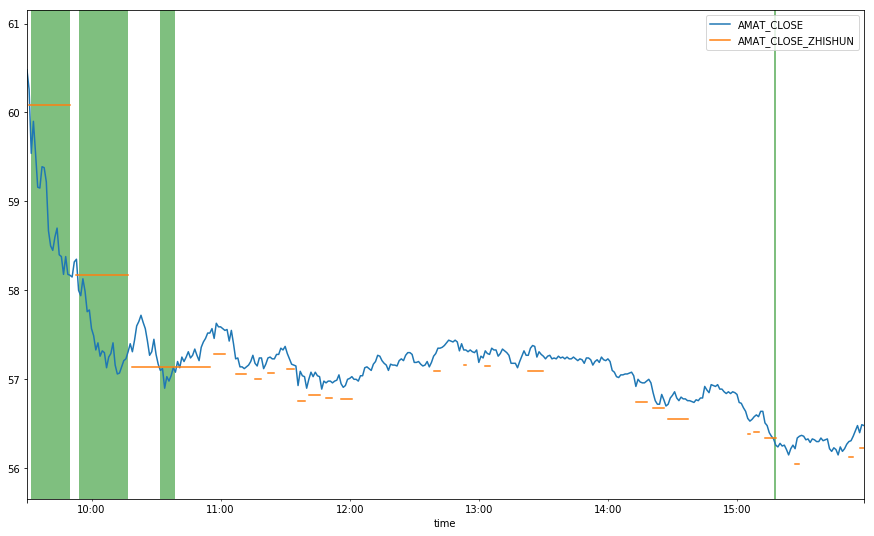

In [32]:
kwargs = {
    "mean2": rocp_mean,
    "std2": rocp_std,
    "nobs2": rocp_nobs
}
col_name_map = {
    'open': 'AMAT_OPEN',
    'high': 'AMAT_HIGH',
    'low': 'AMAT_LOW',
    'close': 'AMAT_CLOSE',
}
# 2017-11-13  -> 2017-11-20, 2017-11-17 da die

selected_date = '2017-11-17'
the_df_selected = the_df.loc[selected_date]
closes_of_selected = the_df_selected['AMAT_CLOSE']
ax = closes_of_selected.plot(figsize=(15, 9), legend=True, 
                             ylim=(closes_of_selected.min() - 0.5, 
                                   closes_of_selected.min() + 5))
drop_downs = closes_of_selected.rolling(window=7, min_periods=1)\
    .apply(statistics.drop_down, kwargs=kwargs)
zhishun_line = ta_indicators.get_zhishun(
    closes_of_selected, drop_downs <= -1, buffer=0.003)

zhishun_line.plot(ax=ax, legend=True)
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(closes_of_selected.index, 
                0, 1,
                where=(closes_of_selected < zhishun_line).values, 
                facecolor='green', alpha=0.5, transform=trans)
plt.show()

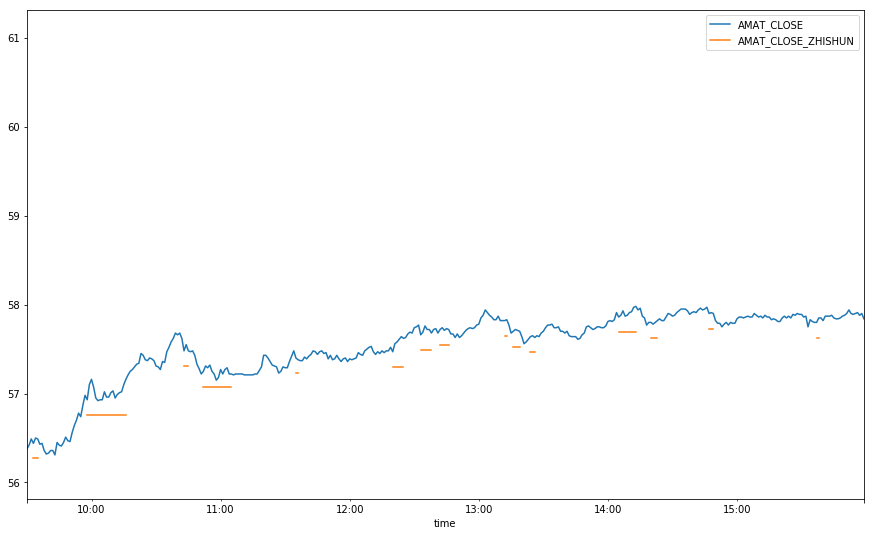

In [33]:
selected_date = '2017-11-16'
the_df_selected = the_df.loc[selected_date]
closes_of_selected = the_df_selected['AMAT_CLOSE']
ax = closes_of_selected.plot(figsize=(15, 9), legend=True, 
                             ylim=(closes_of_selected.min() - 0.5, 
                                   closes_of_selected.min() + 5))
drop_downs = closes_of_selected.rolling(window=7, min_periods=1)\
    .apply(statistics.drop_down, kwargs=kwargs)
zhishun_line = ta_indicators.get_zhishun(
    closes_of_selected, drop_downs <= -1, buffer=0.003)

zhishun_line.plot(ax=ax, legend=True)
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(closes_of_selected.index, 
                0, 1,
                where=(closes_of_selected < zhishun_line).values, 
                facecolor='green', alpha=0.5, transform=trans)
plt.show()

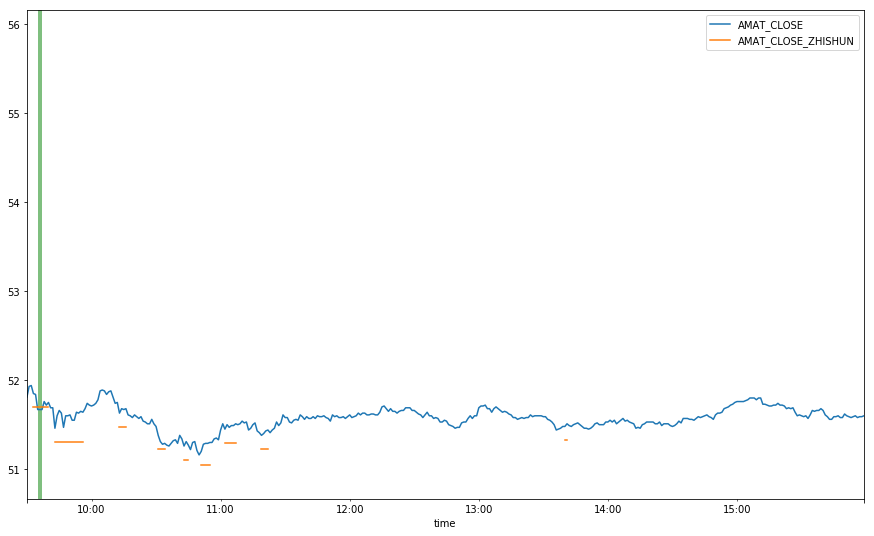

In [34]:
selected_date = '2017-10-04'
the_df_selected = the_df.loc[selected_date]
closes_of_selected = the_df_selected['AMAT_CLOSE']
ax = closes_of_selected.plot(figsize=(15, 9), legend=True, 
                             ylim=(closes_of_selected.min() - 0.5, 
                                   closes_of_selected.min() + 5))
drop_downs = closes_of_selected.rolling(window=7, min_periods=1)\
    .apply(statistics.drop_down, kwargs=kwargs)
zhishun_line = ta_indicators.get_zhishun(
    closes_of_selected, drop_downs <= -1, buffer=0.003)

zhishun_line.plot(ax=ax, legend=True)
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(closes_of_selected.index, 
                0, 1,
                where=(closes_of_selected < zhishun_line).values, 
                facecolor='green', alpha=0.5, transform=trans)
plt.show()

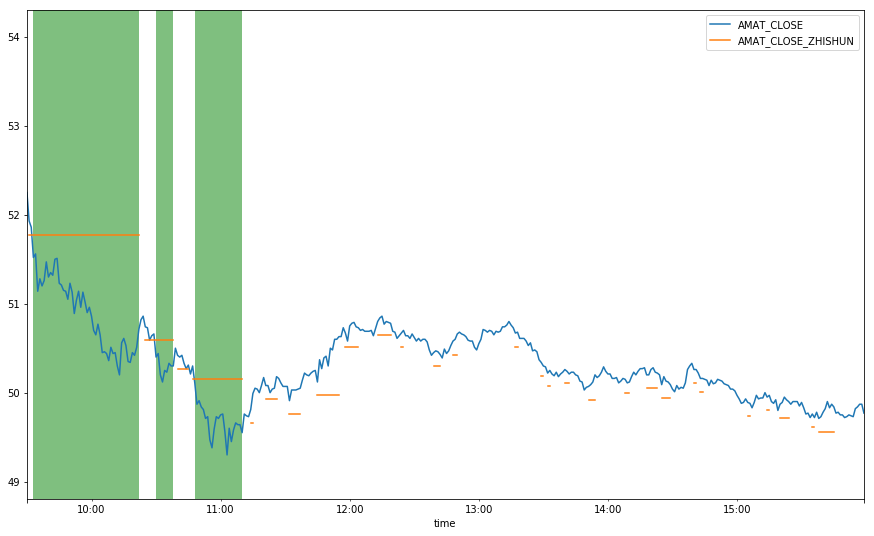

In [35]:
selected_date = '2017-12-04'
the_df_selected = the_df.loc[selected_date]
closes_of_selected = the_df_selected['AMAT_CLOSE']
ax = closes_of_selected.plot(figsize=(15, 9), legend=True, 
                             ylim=(closes_of_selected.min() - 0.5, 
                                   closes_of_selected.min() + 5))
drop_downs = closes_of_selected.rolling(window=7, min_periods=1)\
    .apply(statistics.drop_down, kwargs=kwargs)
zhishun_line = ta_indicators.get_zhishun(
    closes_of_selected, drop_downs <= -1, buffer=0.003)

zhishun_line.plot(ax=ax, legend=True)
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(closes_of_selected.index, 
                0, 1,
                where=(closes_of_selected < zhishun_line).values, 
                facecolor='green', alpha=0.5, transform=trans)
plt.show()